In [1]:
# 필요 라이브러리 import 
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import warnings
warnings.filterwarnings(action='ignore')

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

from sklearn.datasets import make_classification
from collections import Counter

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("../data/8-1 train(std).csv",index_col=0)
test1 = pd.read_csv("../data/8-1 test1(std).csv",index_col=0)
test2 = pd.read_csv("../data/8-1 test2(std).csv",index_col=0)

print(train['label'].value_counts())
print(test1['label'].value_counts())
print(test2['label'].value_counts())

label
0.0    1248
1.0      72
Name: count, dtype: int64
label
0.0    3743
1.0      80
Name: count, dtype: int64
label
0.0    1911
1.0      98
Name: count, dtype: int64


데이터분할

In [3]:
x_train = train.drop("label",axis=1)
y_train = train["label"]
x_test =test1.drop("label",axis=1)
y_test = test1["label"]

오버샘플링 SMOTE

In [4]:
x_train, y_train = SMOTE(random_state=4).fit_resample(x_train,y_train)
print(x_train.shape)
y_train.value_counts()

(2496, 10)


label
0.0    1248
1.0    1248
Name: count, dtype: int64

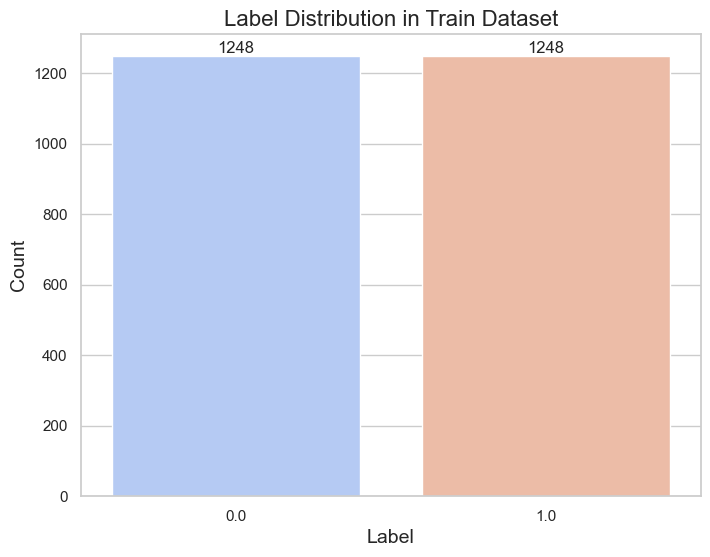

In [5]:
# seaborn 스타일 설정
sns.set(style="whitegrid")

# 라벨의 분포 계산
label_counts = y_train.value_counts()

# 데이터 준비
labels = label_counts.index
counts = label_counts.values

# 바 차트 그리기
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
sns.barplot(x=labels, y=counts, palette="coolwarm")  # seaborn 바 차트 사용

# 제목 및 레이블 설정
plt.title('Label Distribution in Train Dataset', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)

# 각 바에 대한 값을 표시
for i in range(len(labels)):
    plt.text(i, counts[i], counts[i], ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=0)  # x축 라벨 수평으로 설정
plt.show()

In [6]:
# 성능확인 코드
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, average_precision_score


import warnings

def get_clf_eval(MDA_y_test, pred):
    confusion = confusion_matrix(MDA_y_test, pred)
    accuracy = accuracy_score(MDA_y_test, pred)
    precision = precision_score(MDA_y_test, pred)
    recall = recall_score(MDA_y_test, pred)
    roc_score = roc_auc_score(MDA_y_test, pred)
    pr_score = average_precision_score(MDA_y_test, pred)
    f1 = f1_score(MDA_y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도 : {1:.4f}, 재현율:{2:.4f},F1 스코어:{3:.4f}'.format(accuracy, precision, recall, f1, roc_score))
    print('ROC 스코어: {0:.4f}, PR score : {1:.4f}'.format(roc_score, pr_score))

In [7]:
# 임계값에 따른 오차행렬및 스코어 -------->#임계값 최적 : 재현율기준(0.1)/f1기준(0.3)
from sklearn.preprocessing import Binarizer
thresholds = [0.1,0.2,0.3,0.4,0.5]

def get_eval_by_threshold(MDA_y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print("임곗값:", custom_threshold)
        get_clf_eval(MDA_y_test, custom_predict)
        print("---------------------------------------------------------")



In [8]:
# Roc Auc 그래프 값 확인 코드
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def roc_curve_plot(MDA_y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(MDA_y_test, pred_proba_c1)
    
    plt.plot(fprs, tprs, label='ROC')
    plt.plot([0,1],[0,1], 'k--', label = 'Random')
    
    start, end= plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)'); plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.show()

In [10]:
# 1-1 디시전트리 
from sklearn.tree import DecisionTreeClassifier 
dt_clf = DecisionTreeClassifier(random_state=52)

dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)
dt_pred_proba = dt_clf.predict_proba(x_test)   

get_clf_eval(y_test, dt_pred)
get_eval_by_threshold(y_test , dt_pred_proba[:,1].reshape(-1,1), thresholds)
    


오차행렬
[[3372  371]
 [  39   41]]
정확도: 0.8928, 정밀도 : 0.0995, 재현율:0.5125,F1 스코어:0.1667
ROC 스코어: 0.7067, PR score : 0.0612
임곗값: 0.1
오차행렬
[[3372  371]
 [  39   41]]
정확도: 0.8928, 정밀도 : 0.0995, 재현율:0.5125,F1 스코어:0.1667
ROC 스코어: 0.7067, PR score : 0.0612
---------------------------------------------------------
임곗값: 0.2
오차행렬
[[3372  371]
 [  39   41]]
정확도: 0.8928, 정밀도 : 0.0995, 재현율:0.5125,F1 스코어:0.1667
ROC 스코어: 0.7067, PR score : 0.0612
---------------------------------------------------------
임곗값: 0.3
오차행렬
[[3372  371]
 [  39   41]]
정확도: 0.8928, 정밀도 : 0.0995, 재현율:0.5125,F1 스코어:0.1667
ROC 스코어: 0.7067, PR score : 0.0612
---------------------------------------------------------
임곗값: 0.4
오차행렬
[[3372  371]
 [  39   41]]
정확도: 0.8928, 정밀도 : 0.0995, 재현율:0.5125,F1 스코어:0.1667
ROC 스코어: 0.7067, PR score : 0.0612
---------------------------------------------------------
임곗값: 0.5
오차행렬
[[3372  371]
 [  39   41]]
정확도: 0.8928, 정밀도 : 0.0995, 재현율:0.5125,F1 스코어:0.1667
ROC 스코어: 0.7067, PR score : 0.0612
---------

In [11]:
from sklearn.tree import DecisionTreeClassifier 
dt_clf = DecisionTreeClassifier(random_state=52)
from sklearn.model_selection import GridSearchCV
tree = DecisionTreeClassifier(random_state=52)

# key: 하이퍼파라미터 명; value: [후보값들] 을 리스트로 전달
param_grid = {
    'criterion': ['entropy', 'gini'],
            'max_depth': [2,4,6,8],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [4,6,8,10],
            'min_samples_split': [4,6,8,10]}
grid_search = GridSearchCV(tree
                        , param_grid = param_grid
                        , cv = 5 #교차검증시 fold 개수; n번의 교차검증; 데이터들이 돌아가면서 하나씩 검증(validation)에 사용되어 일반화하는 것; 데이터가 많지 않을 때 보통 쓰인다고 함
                        , n_jobs = -1)  #-1: 모든 코어 사용

grid_search.fit(x_train, y_train)

# 최선의 결과 출력
print('최적 하이퍼 파라미터 :{0}, 최적 평균 정확도 :{1:.3f}'.format(grid_search.best_params_, grid_search.best_score_))
a = grid_search.best_params_
keys=list(a.keys())
values = list(a.values())

dt_clf_best = DecisionTreeClassifier(random_state=52,criterion = values[0], max_depth = values[1],max_features=values[2], min_samples_leaf=values[3], min_samples_split=values[4])
dt_clf_best.fit(x_train, y_train)
dt_best_pred = dt_clf_best.predict(x_test)
dt_best_pred_proba = dt_clf_best.predict_proba(x_test)   

print("디시전트리 파라미터적용") 
get_clf_eval(y_test, dt_best_pred)
get_eval_by_threshold(y_test ,dt_best_pred_proba[:,1].reshape(-1,1), thresholds)


최적 하이퍼 파라미터 :{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 4}, 최적 평균 정확도 :0.885
디시전트리 파라미터적용
오차행렬
[[3388  355]
 [  24   56]]
정확도: 0.9009, 정밀도 : 0.1363, 재현율:0.7000,F1 스코어:0.2281
ROC 스코어: 0.8026, PR score : 0.1017
임곗값: 0.1
오차행렬
[[2277 1466]
 [  17   63]]
정확도: 0.6121, 정밀도 : 0.0412, 재현율:0.7875,F1 스코어:0.0783
ROC 스코어: 0.6979, PR score : 0.0369
---------------------------------------------------------
임곗값: 0.2
오차행렬
[[2328 1415]
 [  17   63]]
정확도: 0.6254, 정밀도 : 0.0426, 재현율:0.7875,F1 스코어:0.0809
ROC 스코어: 0.7047, PR score : 0.0380
---------------------------------------------------------
임곗값: 0.3
오차행렬
[[2440 1303]
 [  20   60]]
정확도: 0.6539, 정밀도 : 0.0440, 재현율:0.7500,F1 스코어:0.0832
ROC 스코어: 0.7009, PR score : 0.0382
---------------------------------------------------------
임곗값: 0.4
오차행렬
[[3375  368]
 [  24   56]]
정확도: 0.8975, 정밀도 : 0.1321, 재현율:0.7000,F1 스코어:0.2222
ROC 스코어: 0.8008, PR score : 0.0987
--------------------------------------

In [13]:
# 1-2 랜덤포레스트 구현 
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=52)    

rf_clf.fit(x_train, y_train)
rf_pred = rf_clf.predict(x_test)
rf_pred_proba = rf_clf.predict_proba(x_test)
print("랜덤포레스트") 
get_clf_eval(y_test, rf_pred)
get_eval_by_threshold(y_test , rf_pred_proba[:,1].reshape(-1,1), thresholds)



랜덤포레스트
오차행렬
[[3516  227]
 [  31   49]]
정확도: 0.9325, 정밀도 : 0.1775, 재현율:0.6125,F1 스코어:0.2753
ROC 스코어: 0.7759, PR score : 0.1168
임곗값: 0.1
오차행렬
[[2596 1147]
 [   8   72]]
정확도: 0.6979, 정밀도 : 0.0591, 재현율:0.9000,F1 스코어:0.1109
ROC 스코어: 0.7968, PR score : 0.0553
---------------------------------------------------------
임곗값: 0.2
오차행렬
[[3057  686]
 [  15   65]]
정확도: 0.8166, 정밀도 : 0.0866, 재현율:0.8125,F1 스코어:0.1564
ROC 스코어: 0.8146, PR score : 0.0742
---------------------------------------------------------
임곗값: 0.3
오차행렬
[[3274  469]
 [  19   61]]
정확도: 0.8724, 정밀도 : 0.1151, 재현율:0.7625,F1 스코어:0.2000
ROC 스코어: 0.8186, PR score : 0.0927
---------------------------------------------------------
임곗값: 0.4
오차행렬
[[3416  327]
 [  28   52]]
정확도: 0.9071, 정밀도 : 0.1372, 재현율:0.6500,F1 스코어:0.2266
ROC 스코어: 0.7813, PR score : 0.0965
---------------------------------------------------------
임곗값: 0.5
오차행렬
[[3516  227]
 [  31   49]]
정확도: 0.9325, 정밀도 : 0.1775, 재현율:0.6125,F1 스코어:0.2753
ROC 스코어: 0.7759, PR score : 0.1168
--

In [14]:
# 하이퍼파라미터 Grid-Search
from sklearn.model_selection import GridSearchCV

    # 탐색 범위 정의

grid_search = {'criterion': ['entropy', 'gini'],
            'max_depth': [2,4,6,8],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [4,6,8,10],
            'min_samples_split': [4,6,8,10],
            'n_estimators': [20,40,60,80,100]}

model = RandomForestClassifier(random_state=52)
grid_search = GridSearchCV(estimator = model, param_grid = grid_search, 
                            cv = 5,verbose=0, n_jobs = -1)
grid_search.fit(x_train,y_train)

# 최선의 결과 출력
print('최적 하이퍼 파라미터 :{0}, 최적 평균 정확도 :{1:.3f}'.format(grid_search.best_params_, grid_search.best_score_))
a = grid_search.best_params_
keys=list(a.keys())
values = list(a.values())

rf_clf_best = RandomForestClassifier(random_state=52,criterion = values[0], max_depth = values[1],max_features=values[2], min_samples_leaf=values[3],  min_samples_split=values[4],n_estimators=values[5])
rf_clf_best.fit(x_train, y_train)
rf_best_pred = rf_clf_best.predict(x_test)
rf_best_pred_proba = rf_clf_best.predict_proba(x_test)   

print("랜덤포레스트 파라미터적용") 
get_clf_eval(y_test, rf_best_pred)
get_eval_by_threshold(y_test ,rf_best_pred_proba[:,1].reshape(-1,1), thresholds)

최적 하이퍼 파라미터 :{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 60}, 최적 평균 정확도 :0.924
랜덤포레스트 파라미터적용
오차행렬
[[3404  339]
 [  23   57]]
정확도: 0.9053, 정밀도 : 0.1439, 재현율:0.7125,F1 스코어:0.2395
ROC 스코어: 0.8110, PR score : 0.1086
임곗값: 0.1
오차행렬
[[2055 1688]
 [   7   73]]
정확도: 0.5566, 정밀도 : 0.0415, 재현율:0.9125,F1 스코어:0.0793
ROC 스코어: 0.7308, PR score : 0.0397
---------------------------------------------------------
임곗값: 0.2
오차행렬
[[2789  954]
 [  11   69]]
정확도: 0.7476, 정밀도 : 0.0674, 재현율:0.8625,F1 스코어:0.1251
ROC 스코어: 0.8038, PR score : 0.0611
---------------------------------------------------------
임곗값: 0.3
오차행렬
[[3095  648]
 [  15   65]]
정확도: 0.8266, 정밀도 : 0.0912, 재현율:0.8125,F1 스코어:0.1639
ROC 스코어: 0.8197, PR score : 0.0780
---------------------------------------------------------
임곗값: 0.4
오차행렬
[[3280  463]
 [  18   62]]
정확도: 0.8742, 정밀도 : 0.1181, 재현율:0.7750,F1 스코어:0.2050
ROC 스코어: 0.8257, PR score : 0.0962
------------------

In [15]:
# 1-3 로지스틱회귀
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()

lr_clf.fit(x_train, y_train)
lr_pred = lr_clf.predict(x_test)
lr_pred_proba = lr_clf.predict_proba(x_test)
print("로지스틱회귀") 
get_clf_eval(y_test, lr_pred)
get_eval_by_threshold(y_test , lr_pred_proba[:,1].reshape(-1,1), thresholds)
    

로지스틱회귀
오차행렬
[[3183  560]
 [  22   58]]
정확도: 0.8478, 정밀도 : 0.0939, 재현율:0.7250,F1 스코어:0.1662
ROC 스코어: 0.7877, PR score : 0.0738
임곗값: 0.1
오차행렬
[[1160 2583]
 [   7   73]]
정확도: 0.3225, 정밀도 : 0.0275, 재현율:0.9125,F1 스코어:0.0534
ROC 스코어: 0.6112, PR score : 0.0269
---------------------------------------------------------
임곗값: 0.2
오차행렬
[[2018 1725]
 [   9   71]]
정확도: 0.5464, 정밀도 : 0.0395, 재현율:0.8875,F1 스코어:0.0757
ROC 스코어: 0.7133, PR score : 0.0374
---------------------------------------------------------
임곗값: 0.3
오차행렬
[[2547 1196]
 [  13   67]]
정확도: 0.6838, 정밀도 : 0.0530, 재현율:0.8375,F1 스코어:0.0998
ROC 스코어: 0.7590, PR score : 0.0478
---------------------------------------------------------
임곗값: 0.4
오차행렬
[[2915  828]
 [  18   62]]
정확도: 0.7787, 정밀도 : 0.0697, 재현율:0.7750,F1 스코어:0.1278
ROC 스코어: 0.7769, PR score : 0.0587
---------------------------------------------------------
임곗값: 0.5
오차행렬
[[3183  560]
 [  22   58]]
정확도: 0.8478, 정밀도 : 0.0939, 재현율:0.7250,F1 스코어:0.1662
ROC 스코어: 0.7877, PR score : 0.0738
--

In [16]:
#로지스틱 회귀 최적 하이퍼 파라미터
from sklearn.model_selection import GridSearchCV


params = {'penalty': ['l2','l1','elasticnet','None'],
        'C':[0.01,0.1,1,3,5,10]}

grid_search = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=5)
grid_search.fit(x_train,y_train)
print('최적 하이퍼 파라미어:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_search.best_params_, grid_search.best_score_))

a = grid_search.best_params_
keys=list(a.keys())
values = list(a.values())

lr_clf_best = LogisticRegression(penalty= values[1], C=values[0])
lr_clf_best.fit(x_train, y_train)
lr_best_pred = lr_clf_best.predict(x_test)
lr_best_pred_proba = lr_clf_best.predict_proba(x_test)   

print("로지스틱회귀 파라미터적용") 
get_clf_eval(y_test, lr_best_pred)
get_eval_by_threshold(y_test ,lr_best_pred_proba[:,1].reshape(-1,1), thresholds)


최적 하이퍼 파라미어:{'C': 0.1, 'penalty': 'l2'}, 최적 평균 정확도:0.829
로지스틱회귀 파라미터적용
오차행렬
[[3171  572]
 [  23   57]]
정확도: 0.8444, 정밀도 : 0.0906, 재현율:0.7125,F1 스코어:0.1608
ROC 스코어: 0.7798, PR score : 0.0706
임곗값: 0.1
오차행렬
[[1286 2457]
 [   7   73]]
정확도: 0.3555, 정밀도 : 0.0289, 재현율:0.9125,F1 스코어:0.0559
ROC 스코어: 0.6280, PR score : 0.0282
---------------------------------------------------------
임곗값: 0.2
오차행렬
[[2077 1666]
 [   9   71]]
정확도: 0.5619, 정밀도 : 0.0409, 재현율:0.8875,F1 스코어:0.0782
ROC 스코어: 0.7212, PR score : 0.0386
---------------------------------------------------------
임곗값: 0.3
오차행렬
[[2579 1164]
 [  14   66]]
정확도: 0.6919, 정밀도 : 0.0537, 재현율:0.8250,F1 스코어:0.1008
ROC 스코어: 0.7570, PR score : 0.0479
---------------------------------------------------------
임곗값: 0.4
오차행렬
[[2914  829]
 [  19   61]]
정확도: 0.7782, 정밀도 : 0.0685, 재현율:0.7625,F1 스코어:0.1258
ROC 스코어: 0.7705, PR score : 0.0572
---------------------------------------------------------
임곗값: 0.5
오차행렬
[[3171  572]
 [  23   57]]
정확도: 0.8444, 정밀도 : 0.0906

In [17]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=17,
                    n_estimators=90,
                    max_depth=5,
                    learning_rate=0.03,
                    reg_lambda=2,
                    reg_alpha=0.02,
                    min_split_loss=2
                    )
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
xgb_pred_proba = xgb.predict_proba(x_test)

print("xgboost 파라미터적용") 
get_clf_eval(y_test, xgb_pred)
get_eval_by_threshold(y_test ,xgb_pred_proba[:,1].reshape(-1,1), thresholds)

xgboost 파라미터적용
오차행렬
[[3375  368]
 [  23   57]]
정확도: 0.8977, 정밀도 : 0.1341, 재현율:0.7125,F1 스코어:0.2257
ROC 스코어: 0.8071, PR score : 0.1016
임곗값: 0.1
오차행렬
[[2022 1721]
 [   6   74]]
정확도: 0.5483, 정밀도 : 0.0412, 재현율:0.9250,F1 스코어:0.0789
ROC 스코어: 0.7326, PR score : 0.0397
---------------------------------------------------------
임곗값: 0.2
오차행렬
[[2875  868]
 [  13   67]]
정확도: 0.7696, 정밀도 : 0.0717, 재현율:0.8375,F1 스코어:0.1320
ROC 스코어: 0.8028, PR score : 0.0634
---------------------------------------------------------
임곗값: 0.3
오차행렬
[[3134  609]
 [  16   64]]
정확도: 0.8365, 정밀도 : 0.0951, 재현율:0.8000,F1 스코어:0.1700
ROC 스코어: 0.8186, PR score : 0.0803
---------------------------------------------------------
임곗값: 0.4
오차행렬
[[3289  454]
 [  21   59]]
정확도: 0.8758, 정밀도 : 0.1150, 재현율:0.7375,F1 스코어:0.1990
ROC 스코어: 0.8081, PR score : 0.0903
---------------------------------------------------------
임곗값: 0.5
오차행렬
[[3375  368]
 [  23   57]]
정확도: 0.8977, 정밀도 : 0.1341, 재현율:0.7125,F1 스코어:0.2257
ROC 스코어: 0.8071, PR score : 0